# Session analysis

In [1]:
import pandas as pd

import sys
 
# setting path
sys.path.append('..')

from mna.sessions.eye_session import process_session_eye
from mna.sessions.eeg_session import process_session_eeg
from mna.sessions.motor_session import process_session_motor
from mna.sessions.ecg_session import process_session_ecg

In [2]:
import matplotlib
matplotlib.use('Agg')

# 1. Read a RN App, converted pkl file, and create the metadata and data structure

In [3]:
from os import listdir
from os.path import isfile, join
from mna.utils.rnapp_data_format import read_all_lslpresets, return_metadata_from_name, event_data_from_data
import pickle

In [4]:
data_dir = "../data/"
lsl_dir = "../mna/LSLPresets/"
onlyfiles = [f for f in listdir(data_dir) if isfile(join(data_dir, f)) and '.pkl' in f]
input_path = data_dir + onlyfiles[0] # pick a random file, idx 26 and 

print(f"input_path {input_path}")
metadata_jsons = read_all_lslpresets(path_to_jsonfiles=lsl_dir)
with open(input_path, 'rb') as handle:
    rns_data = pickle.load(handle)
    
## Add metadata to data

for key in rns_data.keys():
    rns_data[key].append(return_metadata_from_name(key, metadata_jsons))

input_path ../data/09_14_2022_13_17_39-Exp_adadrive-Sbj_20-Ssn_3.dats.pkl


# 2. Create new events (trial start etc.)

In [5]:
import numpy as np
event_df = event_data_from_data(rns_data, interrupted_id_sessions=[(13,1), (22,1)])
event_df['trial_damage'] = event_df.damage.diff().fillna(0)
event_df['trial_duration'] = event_df.trial_end_time - event_df.trial_start_time
percent_missing = event_df.notnull().sum() / len(event_df)
summary_statistics = {}
summary_statistics['voice_success_rate'] = percent_missing['voice_timestamp']
if 'chunk_timestamp' in percent_missing:
    summary_statistics['chunk_success_rate'] = percent_missing['chunk_timestamp']
else:
    summary_statistics['chunk_success_rate'] = 0

# temporary fix for pilot phase where we had some incomplete data
if 'block_condition' not in event_df:
    event_df['block_condition'] = 'practice'
    event_df.loc[5:,'block_condition'] = 'voice'

event_df['spoken_difficulty_encoded'] = event_df.spoken_difficulty.replace(to_replace=['easy', 'hard', 'unknown'],
                                                                      value=[1, 2, None])

# Pupil work (for 11/08)

In [8]:
calib_densities = [0, 0, 0.3, 0.5, 0.7, 0.8, 0.8, 0.7, 0.5, 0.3, 0] # sequence of densities, the first we drop
calib_trial_duration = 5 # seconds
calib_blocks = [2, 12] # 1st block is practice, second is calib, and 12th is second calib (not all sessions reached here)
print('calib_densities',len(calib_densities), 'total expected duratino', len(calib_densities)*calib_trial_duration)
event_df

calib_densities 11 total expected duratino 55


,trial_start_time,trial_end_time,ppid,session,block,number_in_block,trial,density,damage,source,destination,chunk_timestamp,chunk,block_condition,spoken_difficulty,voice_timestamp,trial_damage,trial_duration,spoken_difficulty_encoded
0,0.000000,84230.571321,13.0,1.0,1.0,1.0,1.0,0.000000,0.000000,4.0,46.0,84230.571939,South to North,practice,unknown,84227.518569,0.000000,84230.571321,NaN
1,84230.581321,84297.157811,13.0,1.0,1.0,2.0,2.0,0.100000,5.766666,4.0,46.0,84297.157820,South to North,practice,unknown,84294.486048,5.766666,66.576490,NaN
2,84297.167811,84321.093998,13.0,1.0,1.0,3.0,3.0,0.300000,18.907904,4.0,46.0,84321.093904,South to West,practice,unknown,84319.406884,13.141237,23.926187,NaN
3,84321.103998,84343.310596,13.0,1.0,1.0,4.0,4.0,0.500000,30.488705,4.0,46.0,84343.310483,East to North,practice,hard,84341.997827,11.580801,22.206598,2.0
4,84343.320596,84422.078426,13.0,1.0,1.0,5.0,5.0,0.700000,42.924377,4.0,46.0,84422.078313,South to East,practice,unknown,84356.016807,12.435673,78.757830,NaN
5,84422.088426,84564.667816,13.0,1.0,3.0,1.0,17.0,0.766825,52.304337,2.0,32.0,84564.667709,South to North,voice,unknown,84523.965818,9.379959,142.579389,NaN
6,84564.677816,84649.597523,13.0,1.0,3.0,2.0,18.0,0.026853,52.304337,2.0,32.0,84649.597424,South to East,voice,NaN,NaN,0.000000,84.919707,NaN
7,84649.607523,84703.261416,13.0,1.0,3.0,3.0,19.0,0.351018,56.485657,2.0,32.0,84703.261328,West to North,voice,hard,84698.187841,4.181320,53.653894,2.0
8,84703.271416,84739.766443,13.0,1.0,3.0,4.0,20.0,0.359224,92.754387,2.0,32.0,84739.766361,South to East,voice,NaN,NaN,36.268730,36.495027,NaN
9,84739.776443,84765.375890,13.0,1.0,3.0,5.0,21.0,0.108578,92.754387,2.0,32.0,84765.375815,West to North,voice,NaN,NaN,0.000000,25.599448,NaN


In [65]:
import scipy
import matplotlib.pyplot as plt
def pupil_diameter_evoked(eyetracking_df, event_df, fs, pupil, plot_evoked_pupil = False):
    
    time = np.arange(0, 3, 1/fs)
    trial_onset = event_df['trial_start_time']
    baseline_samples = int(fs*0.2)
    onset_3sec_samples = int(fs*3)
    
    baseline_pupil = np.empty(len(trial_onset.index))
    onset_3sec_pupil = np.empty([len(trial_onset.index),onset_3sec_samples])

    for i in event_df.index:
        
        # filter first trial and trial exceed available eyetracking timestamp
        if (trial_onset[i] == 0) or (trial_onset[i] > max(eyetracking_df.timestamp)): 
            baseline_pupil[i] = float("NaN")
            onset_3sec_pupil[i,:] = float("NaN")
        else:
            trial_baseline_pupil = eyetracking_df[pupil][(eyetracking_df.timestamp >= trial_onset[i]-.2) & 
                                                         (eyetracking_df.timestamp < trial_onset[i])].replace(-1, np.nan)
            
            trial_onset_3sec_pupil = eyetracking_df[pupil][(eyetracking_df.timestamp >= trial_onset[i]) & 
                                                        (eyetracking_df.timestamp < trial_onset[i]+3)].replace(-1, np.nan)
            
            # fill in missing values through interpolation
            trial_baseline_pupil = trial_baseline_pupil.interpolate(method ='linear', 
                                                                    limit_direction ='forward')
            trial_onset_3sec_pupil = trial_onset_3sec_pupil.interpolate(method ='linear', 
                                                                        limit_direction ='forward')

            # keep all trial dimension consistent through linear interpolation (due to inconsistent sample rate)
            if len(trial_baseline_pupil) != baseline_samples:
                baseline_interp = scipy.interpolate.interp1d(np.arange(trial_baseline_pupil.size),
                                                             trial_baseline_pupil)
                trial_baseline_pupil_interp = baseline_interp(np.linspace(0, trial_baseline_pupil.size-1, baseline_samples))
            else: 
                trial_baseline_pupil_interp = trial_baseline_pupil

            if len(trial_onset_3sec_pupil) != onset_3sec_samples:
                onset_3sec_pupil_interp = scipy.interpolate.interp1d(np.arange(trial_onset_3sec_pupil.size),
                                                                     trial_onset_3sec_pupil)
                trial_onset_3sec_pupil_interp = onset_3sec_pupil_interp(np.linspace(0, trial_onset_3sec_pupil.size-1, onset_3sec_samples))
            else: 
                trial_onset_3sec_pupil_interp = trial_onset_3sec_pupil

            # invalidate trials with more than half invalid samples
            if (np.isnan(trial_baseline_pupil_interp).sum() >= int(baseline_samples*.5) or 
                np.isnan(trial_onset_3sec_pupil_interp).sum() >= int(onset_3sec_samples*.5)):
                baseline_pupil[i] = float("NaN")
            else:
                baseline_pupil[i] = trial_baseline_pupil_interp.mean()
        
            # baseline correction
            onset_3sec_pupil[i,:] = trial_onset_3sec_pupil_interp - baseline_pupil[i]
    
    # evoked pupil diameter
    evoked_pupil_diameter = np.mean(onset_3sec_pupil, axis = 1)
    
    # plot easy and hard trials - averaged
    valid_baseline_trials = onset_3sec_pupil[~np.isnan(baseline_pupil)]
    easy_trials = onset_3sec_pupil[event_df['spoken_difficulty']=='easy']
    hard_trials = onset_3sec_pupil[event_df['spoken_difficulty']=='hard']

    def plot_evoked_trials(trials, line_color, fill_color, trial_label):
        trials_mean = np.nanmean(trials, axis = 0)
        trials_std = np.nanstd(trials, axis = 0)

        under_line = trials_mean - trials_std
        over_line = trials_mean + trials_std

        plt.plot(time, trials_mean, line_color, label = trial_label)
        plt.fill_between(time, under_line, over_line, color=fill_color, alpha=.1)
        plt.legend()
        
    if plot_evoked_pupil:
        plot_evoked_trials(easy_trials, 'r-', 'r', 'Easy')
        plot_evoked_trials(hard_trials, 'k-', 'k', 'Hard')
    
    return evoked_pupil_diameter

array([        nan, -1.24790183, -1.53436182, -0.16267853,  0.24547005,
        0.02837894,         nan,  0.836855  , -0.19888649,  0.00177371,
        0.74041409, -0.25094999,  0.001667  , -0.28322517,  0.2327727 ,
       -0.21846169,  0.14441732,  0.38174884,  0.33564826,  0.03323318,
       -0.52951355, -0.43459176,  0.07505023,  0.00448568, -0.23360747,
       -1.15899709,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])

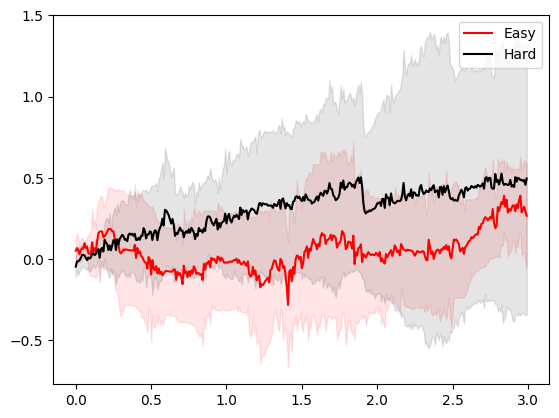

In [66]:
%matplotlib inline

eye_channel = 'Unity_ViveSREyeTracking'
pupil_diameter_evoked(eyetracking_df, event_df, rns_data[eye_channel][2]['NominalSamplingRate'], pupil,plot_evoked_pupil=True)

In [43]:
import numpy as np

df = pd.DataFrame(rns_data['Unity_ViveSREyeTracking'][0], columns=rns_data['Unity_ViveSREyeTracking'][1],
                      index=rns_data['Unity_ViveSREyeTracking'][2]['ChannelNames']).T
eyetracking_df = df.reset_index().rename(columns={'index': 'timestamp'})

calib_block = 3
pupil = 'L Pupil Diameter'
calib_block_onset = float(event_df.trial_start_time[(event_df.block==calib_block) & (event_df.number_in_block==1)])
calib_block_offset = float(event_df.trial_end_time[(event_df.block==calib_block) & (event_df.number_in_block==1)])
trial_baseline_pupil = eyetracking_df[(eyetracking_df.timestamp >= calib_block_onset) & 
                                                         (eyetracking_df.timestamp < calib_block_offset)].replace(-1, np.nan)


<AxesSubplot:xlabel='timestamp'>

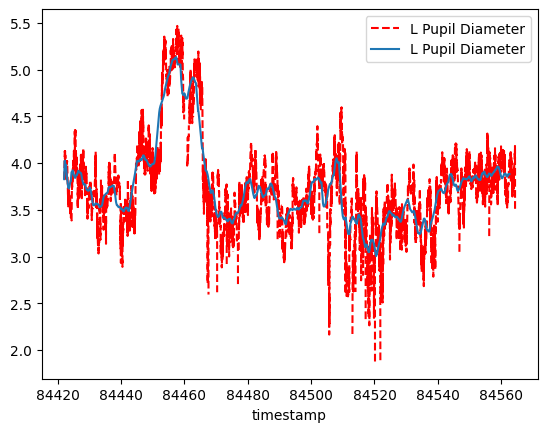

In [57]:
%matplotlib inline

ax = trial_baseline_pupil.plot(x='timestamp',y=pupil, style = 'r--', label = pupil)
trial_baseline_pupil.ewm(span = 500).mean().plot(x='timestamp',y=pupil, ax=ax)

# 3. ECG Data Processing

In [6]:
post_processed_event_df = process_session_ecg(rns_data, event_df,plot_frequency=20,plot_ecg_snippet=40)

# 4. Eye Tracking Processing

In [34]:
post_processed_event_df = process_session_eye(rns_data, post_processed_event_df,detect_blink=True,plot_frequency=20, plot_eye_snippet=40)

Computed velocity exceeds threshold. Inappropriate filter setup? [2271.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2417.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1538.4 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1364.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1198.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1039.1 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1868.7 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1366.8 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [2143.3 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1067.0 > 1000.0 deg/s]
Computed velocity exceeds threshold. Inappropriate filter setup? [1175.5 > 1000.0 deg/s]
Computed velocity exc

# 5. EEG

In [7]:
import mne
import numpy as np
import autoreject
import matplotlib.pyplot as plt
import pandas as pd
import os
from mne_features.univariate import compute_hjorth_mobility,compute_pow_freq_bands
from mne.preprocessing import corrmap
from eeglib.features import (bandPower, hjorthActivity, hjorthMobility,
                             hjorthComplexity, sampEn, LZC, DFA, _HFD, HFD, PFD,
                             synchronizationLikelihood)


def process_session_eeg(rns_data, event_df, event_column='spoken_difficulty_encoded', eeg_channel='BioSemi',
                        eeg_montage='biosemi64', save_path='../output/', sbj_session = None, save_raw_eeg = False,
                        run_autoreject=True, autoreject_epochs=20, run_ica=True, template_ica = None, average_reference=True,
                        downsampling = True, n_decim = 16, low_cut=1, hi_cut=55, plot_epochs=False, bands_limits=None, 
                        analyze_pre_ica = False, eye_movement_removal=True, tmin=-.2, tmax=3, baseline=(None, 0),
                        normalize_pow_freq=True, filter_events=True):

    if bands_limits is None:
        bands_limits = [4, 8, 15, 32, 55]
    if filter_events:
        event_detected = event_df[event_column].notnull()
        event_recognized_df = event_df[event_detected]
    else:
        event_recognized_df = event_df

    eeg_channel_names = mne.channels.make_standard_montage(eeg_montage).ch_names
    df = pd.DataFrame(rns_data[eeg_channel][0], columns=rns_data[eeg_channel][1],
                      index=rns_data[eeg_channel][2]['ChannelNames']).T
    starting_time_s = rns_data[eeg_channel][1][0]
    freq = rns_data[eeg_channel][2]['NominalSamplingRate']
    rna_channel_names = list(df.columns)
    rna_channel_names[1:65] = eeg_channel_names
    info = mne.create_info(ch_names=rna_channel_names, ch_types=['stim'] + ['eeg'] * 64 + ['ecg'] * 2 + ['misc'] * 22,
                           sfreq=freq)
    info.set_montage(eeg_montage)

    raw = mne.io.RawArray(df.T * 1e-6, info)
    raw = raw.pick('eeg')
    
    if average_reference:
        raw = raw.set_eeg_reference(ref_channels='average')  # set average reference
    if low_cut or hi_cut:
        raw.filter(l_freq=low_cut, h_freq=hi_cut)
    if downsampling:
        raw.resample(freq/n_decim)
        freq /= n_decim
    trial_start_time = event_recognized_df.trial_start_time - starting_time_s  # reference for mne
    event_values = event_recognized_df[event_column].values
    events = np.column_stack((trial_start_time.values * freq,
                              np.zeros(len(event_recognized_df), dtype=int),
                              event_values)).astype(int)
    event_dict = dict(easy=1, hard=2, unknown=0)
    
    # save raw data
    if save_raw_eeg:
        
        raw_eeg_dir = '../output/saved_files/raw_eeg/'
        if not os.path.isdir(raw_eeg_dir): os.makedirs(raw_eeg_dir)
        raw.save(os.path.join(raw_eeg_dir, sbj_session+'_eeg_filt_raw.fif'), overwrite=True)

    if run_ica:
        
        # create duplicate raw, event_df, event_recognized_df for pre and post ica comparison
        if analyze_pre_ica:
            raw_pre_ica = raw.copy()
            event_df_pre_ica = event_df
            event_recognized_df_pre_ica = event_recognized_df

        # Fit ICA
        ica = mne.preprocessing.ICA(n_components=64, random_state=64) # n_components as a decimal set % explained variance
        ica.fit(raw)
        
        # ica.plot_components(picks = range(0,10))
        
        # # Automatic Artifact Detection
        # eog_idx, eog_scores = ica.find_bads_eog(raw, ch_name = ['Fp1', 'Fp2'])
        
        # Semi automatic artifact detection - Corrmap
        if (sbj_session == 'sbj20ssn03') or (template_ica == None):
            if eye_movement_removal:
                eog_idx = [4, 5]
            else:
                eog_idx = [5]
        else:
            icas = [template_ica]+[ica]
            corrmap(icas, template= (0,5), label = "blink", show=False)
            
            if eye_movement_removal:
                corrmap(icas, template= (0,4), label = "horizontal_eye_movement", show=False)
            identified_ica_label = [ica.labels_ for ica in icas]
            
            if eye_movement_removal:
                eog_idx = identified_ica_label[1]['blink']+identified_ica_label[1]['horizontal_eye_movement']
            else:
                eog_idx = identified_ica_label[1]['blink']
        
        # Reconstruct filtered raw signal without Eye Components
        ica.apply(raw, exclude=eog_idx)
    else:
        ica = None
        eog_idx = None
    
    def process_session_eeg_inner(raw, event_recognized_df, event_df):
    
        # epochs = mne.Epochs(raw, events, event_id=event_dict, tmin= -3.2, tmax=0, baseline =(-3.2, -3.0), preload=True, 
        #                     on_missing='warn')
        epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=tmin, tmax=tmax, baseline=baseline, preload=True, 
                                on_missing='warn')
        event_recognized_df = event_recognized_df[[e==() for e in epochs.drop_log]] # only keep good epochs in event_df
        reject_log = None
        
        # EEG Feature Extraction - 24 features
        extracted_24_features_df = eeg_features(epochs, event_recognized_df, bands_limits, eeg_channel_names, freq, normalize_pow_freq=normalize_pow_freq)

        if len(epochs) < 10: # we need at least 10 epochs to run autoreject for cross validation
            bad_epochs = pd.Series(np.full(len(event_df),np.NAN), index=event_df.index, name='autorejected')
            event_df = event_df.join(bad_epochs)
            reject_log = None
        elif run_autoreject:
            ar = autoreject.AutoReject(random_state=11,
                                       n_jobs=1, verbose=False)
            ar.fit(epochs[:autoreject_epochs])  # fit on a few epochs to save time
            epochs_ar, reject_log = ar.transform(epochs, return_log=True)
            bad_epochs = pd.Series(reject_log.bad_epochs, index=event_recognized_df.index, dtype=bool, name='autorejected')
            event_df = event_df.join(bad_epochs)
            epochs = epochs_ar
            
        return epochs, event_recognized_df, reject_log, event_df, extracted_24_features_df
    
    epochs, event_recognized_df, reject_log, event_df, extracted_24_features_df = process_session_eeg_inner(raw,
                                                                                    event_recognized_df, event_df)
    try:
        if plot_epochs:
            if not os.path.isdir(save_path): os.makedirs(save_path)
            ppid = event_recognized_df.iloc[0].ppid
            session = event_recognized_df.iloc[0].session
            block = event_recognized_df.iloc[0].block
            trial = event_recognized_df.iloc[0].number_in_block

            easy = epochs['easy'].average()
            hard = epochs['hard'].average()
            fig, axd = plt.subplot_mosaic([['left', 'left', 'right', 'right'],
                                           ['lower left left', 'lower left right', 'lower right left',
                                            'lower right right']],
                                          figsize=(15, 12), constrained_layout=True)

            easy.plot(spatial_colors=True, axes=axd['left'])
            hard.plot(spatial_colors=True, axes=axd['right'])
            epochs['easy'].plot_psd_topomap(bands=[(8, 12, 'Alpha'), (12, 30, 'Beta')], ch_type='eeg',
                                            normalize=True,
                                            axes=[axd['lower left left'], axd['lower left right']])
            epochs['hard'].plot_psd_topomap(bands=[(8, 12, 'Alpha'), (12, 30, 'Beta')], ch_type='eeg',
                                            normalize=True,
                                            axes=[axd['lower right left'], axd['lower right right']])
            axd['left'].title.set_text('Average (easy)')
            axd['right'].title.set_text('Average (hard)')
            axd['lower left left'].title.set_text('Alpha (8-12Hz)')
            axd['lower left right'].title.set_text('Beta (12-30Hz) PSD (easy)')
            axd['lower right left'].title.set_text('Alpha (8-12Hz)')
            axd['lower right right'].title.set_text('Beta (12-30Hz) PSD (hard)')
            plt.show()
            fig.savefig(f"{save_path}ppid_{ppid}_session_{session}_block_{block}_trial_{trial}_eeg.png")
            plt.close()
            if reject_log:
                result_fig = reject_log.plot('horizontal')
                result_fig.savefig( 
                    f"{save_path}ppid_{ppid}_session_{session}_block_{block}_trial_{trial}_eeg_autoreject_preica.png")
                plt.close()
            ica.plot_components(show=False)
            plt.savefig(f"{save_path}ppid_{ppid}_session_{session}_block_{block}_trial_{trial}_eeg_ica.png")
            plt.close()
    except Exception as e:
        print('some plotting error', e)
        pass
    event_df = event_df.join(extracted_24_features_df)
    
    if run_ica and analyze_pre_ica:
        _, _, _, event_df_pre_ica, extracted_24_features_df_pre_ica = process_session_eeg_inner(raw_pre_ica, 
                                                                        event_recognized_df_pre_ica, event_df_pre_ica)
        
        event_df_pre_ica.columns = event_df_pre_ica.columns.str.replace("autorejected", "autorejected_raw")
        extracted_24_features_df_pre_ica = extracted_24_features_df_pre_ica.add_suffix("_raw")

        event_df = event_df.join(event_df_pre_ica['autorejected_raw'])
        event_df = event_df.join(extracted_24_features_df_pre_ica)

    return event_df, epochs, events, info, reject_log, ica, eog_idx

def eeg_features(epochs, event_recognized_df, bands_limits, eeg_channel_names, fs, win_size = 1024, normalize_pow_freq=True):
    
    # identify available frequency bands
    bands = np.asarray(bands_limits)
    band_intervals = list(zip(bands[:-1], bands[1:]))
    
    #initiate empty matrix for all features
    band_power_all = np.empty([len(epochs), len(eeg_channel_names)*len(band_intervals)])
    hjorth_activity = np.empty([len(epochs), len(eeg_channel_names)])
    hjorth_mobility = np.empty([len(epochs), len(eeg_channel_names)])
    hjorth_complexity = np.empty([len(epochs), len(eeg_channel_names)])
    higuchi_fd = np.empty([len(epochs), len(eeg_channel_names)])
    sample_entropy = np.empty([len(epochs), len(eeg_channel_names)])
    
    # create column list for dataframe (band power column arrangement will be different than others due to its function)
    channel_band_power = [f"{chan_name}_{each_band[0]}-{each_band[1]}_Hz_Power"
                              for chan_name in eeg_channel_names
                                  for each_band in band_intervals]
    band_specific_features_list = ['Hjorth_Activity', 'Hjorth_Mobility', 'Hjorth_Complexity', 
                                   'Higuchi_FD', 'Sample_entropy']
    band_specific_features = [f"{chan_name}_{each_band[0]}-{each_band[1]}_Hz_{each_feature}"
                          for each_feature in band_specific_features_list
                              for each_band in band_intervals
                                  for chan_name in eeg_channel_names]
    # combine column name for all features
    all_features = channel_band_power + band_specific_features
    
    # band power calculation
    for i in range(len(epochs)):
        eeg_data = np.squeeze(epochs.get_data(item=i))
        band_power = compute_pow_freq_bands(sfreq=fs, data=eeg_data, freq_bands=bands, normalize=normalize_pow_freq,
                                            psd_params={'welch_n_fft': win_size, 'welch_n_per_seg': win_size})
        band_power_all[i, :] = band_power
    
    # Other features calculation
    for index, freq_band in enumerate(band_intervals):
        band_specific_epoch = np.squeeze(epochs.copy().filter(freq_band[0],freq_band[1], verbose = False).get_data())
        for i in range(len(epochs.events)):
            for ii in range(64):
                # band-specific Hjorth activity, mobility and complexity
                hjorth_activity[i,ii] = hjorthActivity(band_specific_epoch[i][ii])
                hjorth_mobility[i,ii] = hjorthMobility(band_specific_epoch[i][ii])
                hjorth_complexity[i,ii] = hjorthComplexity(band_specific_epoch[i][ii])

                # band-specific HFD
                higuchi_fd[i,ii] = HFD(band_specific_epoch[i][ii])

                # band-specific sample entropy
                sample_entropy[i,ii] = sampEn(band_specific_epoch[i][ii])
    # concatenate each band specific features into a single matrix 
        if index == 0:
            hjorth_activity_all = hjorth_activity
            hjorth_mobility_all = hjorth_mobility
            hjorth_complexity_all = hjorth_complexity
            higuchi_fd_all = higuchi_fd
            sample_entropy_all = sample_entropy
        else:
            hjorth_activity_all = np.hstack((hjorth_activity_all, hjorth_activity))
            hjorth_mobility_all = np.hstack((hjorth_mobility_all, hjorth_mobility))
            hjorth_complexity_all = np.hstack((hjorth_complexity_all, hjorth_complexity))
            higuchi_fd_all = np.hstack((higuchi_fd_all, higuchi_fd))
            sample_entropy_all = np.hstack((sample_entropy_all, sample_entropy))
    # concatenate all features into a single matrix and convert to dataframe
    all_eeg_features = np.hstack((band_power_all, hjorth_activity_all, hjorth_mobility_all,
                                  hjorth_complexity_all, higuchi_fd_all, sample_entropy_all)) 
    all_eeg_features_df = pd.DataFrame(all_eeg_features, index=event_recognized_df.index, columns=all_features)

    return all_eeg_features_df

In [8]:
post_processed_event_df, epochs, events, event_dict, info, reject_log, ica = process_session_eeg(rns_data, post_processed_event_df,
                                                                    event_column='spoken_difficulty_encoded', run_autoreject=True, run_ica=True,
                                                                                                normalize_pow_freq = False)

Creating RawArray with float64 data, n_channels=89, n_times=3399947
    Range : 0 ... 3399946 =      0.000 ...  1660.130 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 61.88 Hz)
- Filter length: 6759 samples (3.300 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    7.8s finished


Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 64 components
Fitting ICA took 45.4s.
Applying ICA to Raw instance
    Transforming to ICA space (64 components)
    Zeroing out 2 ICA components
    Projecting back using 64 PCA components
Not setting metadata
40 matching events found
Setting baseline interval to [-0.203125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 40 events and 411 original time points ...
0 bad epochs dropped
Dropped 6 epochs: 11, 17, 23, 25, 29, 33


Applying baseline correction (mode: mean)


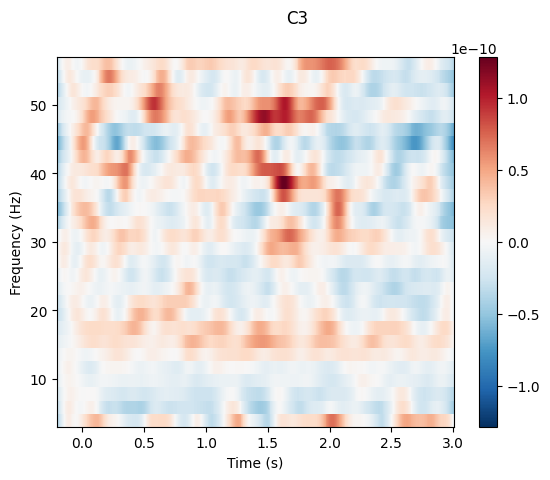

Applying baseline correction (mode: mean)


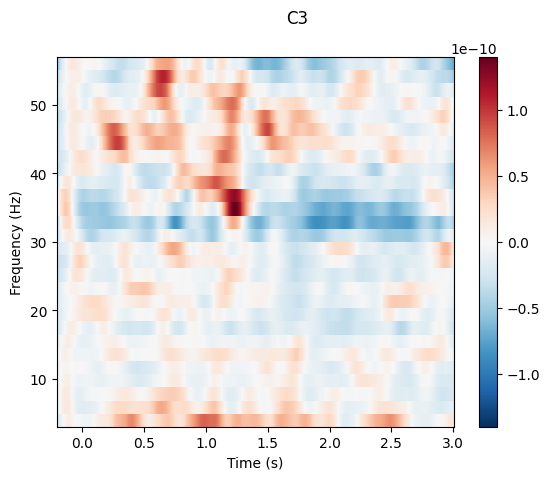

[<Figure size 640x480 with 2 Axes>]

In [9]:
from mne.time_frequency import tfr_morlet, psd_multitaper, psd_welch
%matplotlib inline

epochs_easy = epochs['easy']
epochs_hard = epochs['hard']

# freq_range = np.logspace(*np.log10([4, 55]), num=15)
freq_range = np.linspace(4, 56, 28)
n_cycles = freq_range / 2.

power_easy, itc_easy = tfr_morlet(epochs_easy, freqs=freq_range, n_cycles=n_cycles, use_fft=True, return_itc=True, n_jobs=1)
power_hard, itc_hard = tfr_morlet(epochs_hard, freqs=freq_range, n_cycles=n_cycles, use_fft=True, return_itc=True, n_jobs=1)

sel_chan = 12

# power_easy.plot_topo(baseline=(-0.5, -.2), mode='mean', title='Average power')
# power_easy.plot([sel_chan], baseline=(-3.2, -3), mode='mean', title=power_easy.ch_names[sel_chan])
power_easy.plot([sel_chan], baseline=(-0.2, 0), mode='mean', title=power_easy.ch_names[sel_chan])
# power_easy.plot([sel_chan], baseline=None, mode='mean', title=power_easy.ch_names[sel_chan])

# power_hard.plot_topo(baseline=None, mode='mean', title='Average power')
power_hard.plot([sel_chan], baseline=(-0.2, 0), mode='mean', title=power_hard.ch_names[sel_chan])
# power_hard.plot([sel_chan], baseline=None, mode='mean', title=power_hard.ch_names[sel_chan])


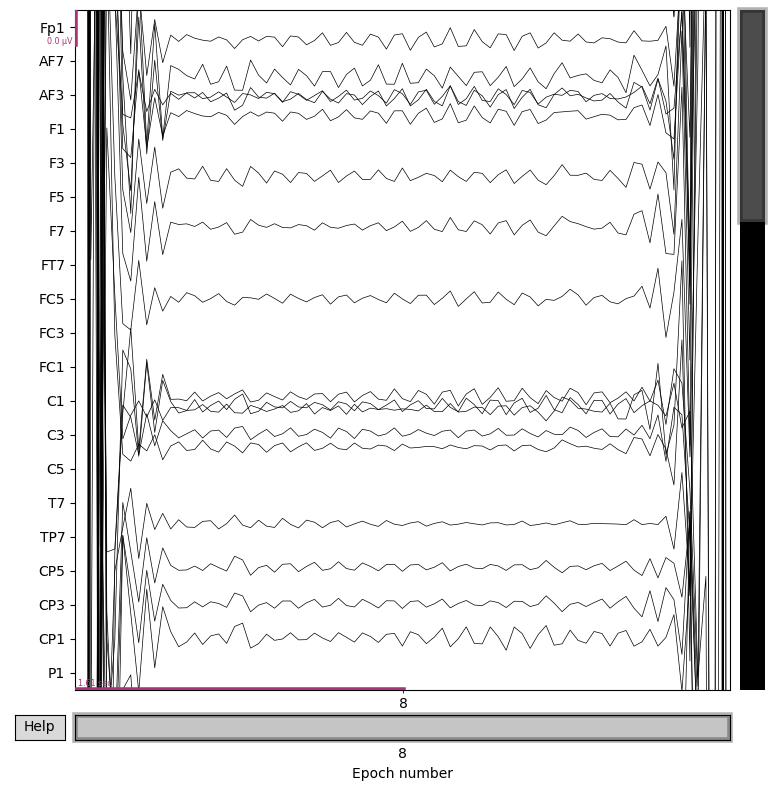

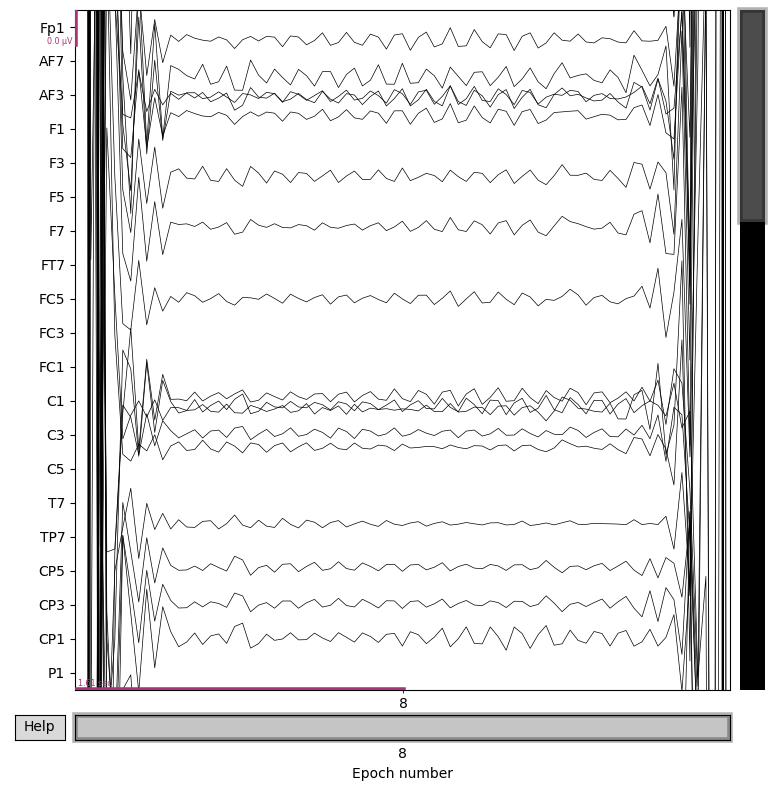

In [81]:
epochs[8].plot(scalings=1e-11)

# 5. Motor

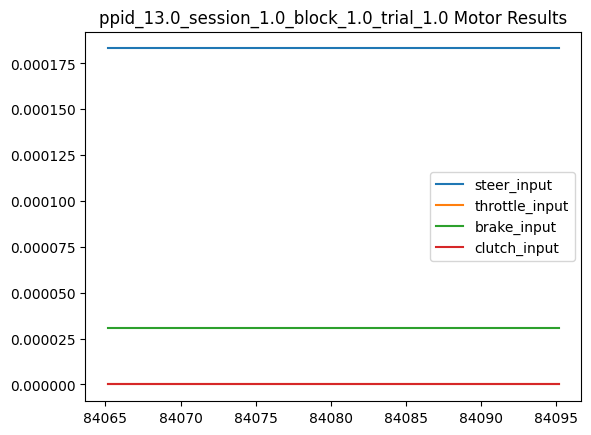

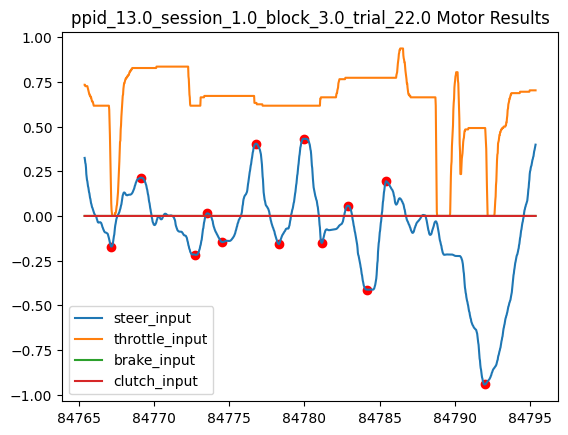

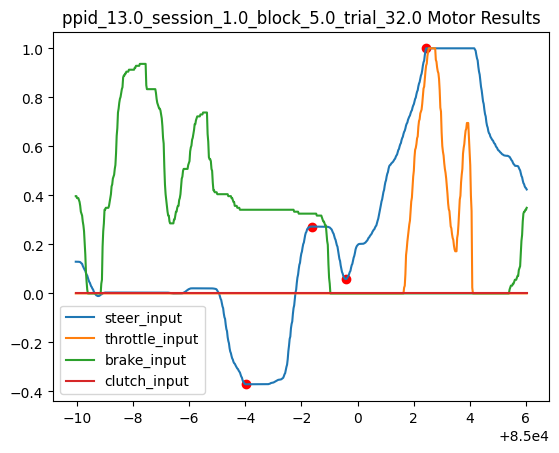

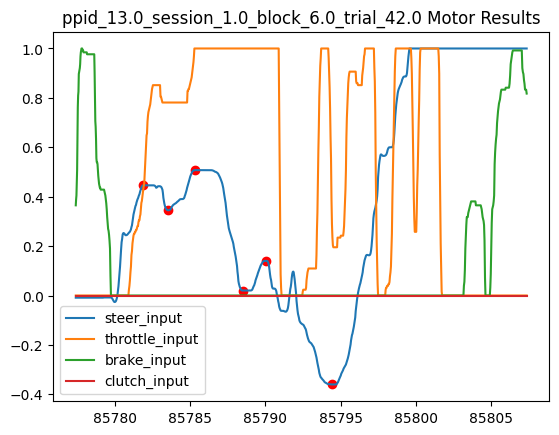

In [8]:
post_processed_event_df, turns_df, motor_data = process_session_motor(rns_data, post_processed_event_df, motor_channel='Unity_MotorInput',
                                                plot_motor_result = True, plot_motor_snippet = 30, plot_frequency = 10)


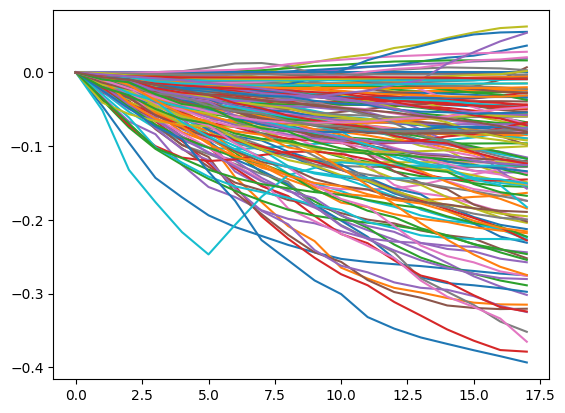

In [21]:
import matplotlib.pyplot as plt
for i, row in turns_df.iterrows():
    if row['turn_type']=='left':
        baseline_adjust = row['raw_data']-row['raw_data'][0]
        plt.plot(baseline_adjust)

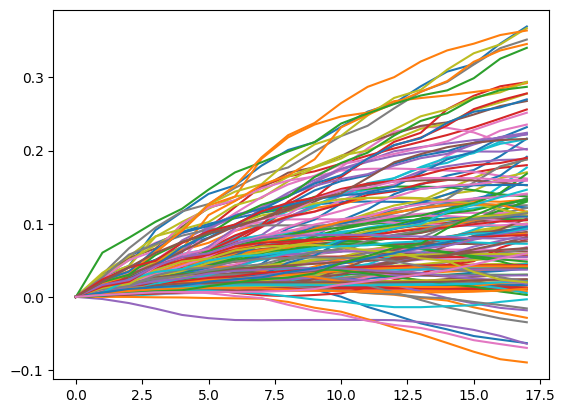

In [22]:
for i, row in turns_df.iterrows():
    if row['turn_type']=='right':
        baseline_adjust = row['raw_data']-row['raw_data'][0]
        plt.plot(baseline_adjust)

In [23]:
turns_df

,trial_start_time,trial_end_time,ppid,session,block,number_in_block,trial,density,damage,source,...,measures.s,measures.sd1/sd2,measures.breathingrate,measures,raw_data,turn_type,abs_sum_delta_steer_input,abs_sum_delta_throttle_input,abs_sum_delta_brake_input,abs_sum_delta_clutch_input
0,84186.434947,84187.434947,13.0,1.0,1.0,1.0,1.0,0.000000,0.000000,4.0,...,20694.511366,0.857018,0.307909,NaN,"[0.117218017578125, 0.112548828125, 0.10964965...",left,129.442871,438.203125,0.162415,0.0
1,84224.416304,84225.416304,13.0,1.0,1.0,1.0,1.0,0.000000,0.000000,4.0,...,20694.511366,0.857018,0.307909,NaN,"[0.299530029296875, 0.29620361328125, 0.289672...",left,144.597412,401.617188,395.317139,0.0
2,84218.355423,84219.355423,13.0,1.0,1.0,1.0,1.0,0.000000,0.000000,4.0,...,20694.511366,0.857018,0.307909,NaN,"[-0.047454833984375, -0.037872314453125, -0.03...",right,61.448425,275.960938,0.016449,0.0
3,84227.041282,84228.041282,13.0,1.0,1.0,1.0,1.0,0.000000,0.000000,4.0,...,20694.511366,0.857018,0.307909,NaN,"[0.0091552734375, 0.012725830078125, 0.0154724...",right,65.382233,242.992188,0.015472,0.0
4,84234.086445,84235.086445,13.0,1.0,1.0,2.0,2.0,0.100000,5.766666,4.0,...,4227.154455,0.505017,0.345543,NaN,"[0.0662841796875, 0.062774658203125, 0.0601501...",left,983.699707,569.039062,300.640259,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,86069.737859,86070.737859,13.0,1.0,7.0,5.0,47.0,0.241622,677.510208,3.0,...,66293.776714,0.759673,0.200763,NaN,"[0.171844482421875, 0.165435791015625, 0.16171...",left,NaN,NaN,NaN,NaN
289,86045.290689,86046.290689,13.0,1.0,7.0,5.0,47.0,0.241622,677.510208,3.0,...,66293.776714,0.759673,0.200763,NaN,"[-0.165557861328125, -0.151580810546875, -0.14...",right,NaN,NaN,NaN,NaN
290,86050.257676,86051.257676,13.0,1.0,7.0,5.0,47.0,0.241622,677.510208,3.0,...,66293.776714,0.759673,0.200763,NaN,"[-0.0731201171875, -0.0567626953125, -0.050170...",right,NaN,NaN,NaN,NaN
291,86063.362017,86064.362017,13.0,1.0,7.0,5.0,47.0,0.241622,677.510208,3.0,...,66293.776714,0.759673,0.200763,NaN,"[-0.239532470703125, -0.21905517578125, -0.199...",right,NaN,NaN,NaN,NaN


# 5. Save

In [18]:
post_processed_event_df.to_csv(f"../output/ppid_{post_processed_event_df.iloc[0].ppid}_session_{post_processed_event_df.iloc[0].session}.csv")